In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

def generate_time_series(batch_size, n_steps):
 freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
 time = np.linspace(0, 1, n_steps)
 series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) # wave 1
 series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
 series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5) # + noise
 return series[..., np.newaxis].astype(np.float32)

n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]
X_test

array([[[-0.05220772],
        [-0.01674023],
        [ 0.04247396],
        ...,
        [ 0.56309116],
        [ 0.36881587],
        [ 0.27666706]],

       [[ 0.54761165],
        [ 0.45484307],
        [ 0.28922722],
        ...,
        [-0.23131353],
        [ 0.063315  ],
        [ 0.20773423]],

       [[-0.55210626],
        [-0.3765197 ],
        [-0.06357652],
        ...,
        [-0.63196886],
        [-0.57014304],
        [-0.3783636 ]],

       ...,

       [[ 0.33423355],
        [ 0.22143444],
        [ 0.12462133],
        ...,
        [ 0.6651629 ],
        [ 0.6111709 ],
        [ 0.46546745]],

       [[ 0.5940009 ],
        [ 0.6231213 ],
        [ 0.57390004],
        ...,
        [ 0.32739896],
        [ 0.52463907],
        [ 0.6312194 ]],

       [[ 0.01772414],
        [ 0.22636285],
        [ 0.42919785],
        ...,
        [-0.17617697],
        [-0.34911504],
        [-0.5132642 ]]], dtype=float32)

In [6]:
#1===> Model's Definition
model = keras.models.Sequential([
 keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
 keras.layers.SimpleRNN(20),
 keras.layers.Dense(1)
])
#===> Compiling The Model
model.compile(optimizer='Adam',
              loss='mean_squared_error')
#3===> Training the Model
model.fit(X_train, y_train,
          epochs=20,
          verbose=1,
          validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 11s 24ms/step - loss: 0.0165 - val_loss: 0.0055
Epoch 2/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0046 - val_loss: 0.0041
Epoch 3/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0038 - val_loss: 0.0041
Epoch 4/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 5/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 6/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0034 - val_loss: 0.0042
Epoch 7/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0033 - val_loss: 0.0042
Epoch 8/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 9/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 10/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0031 - val_l

1/1 [==============================] - 0s 30ms/step


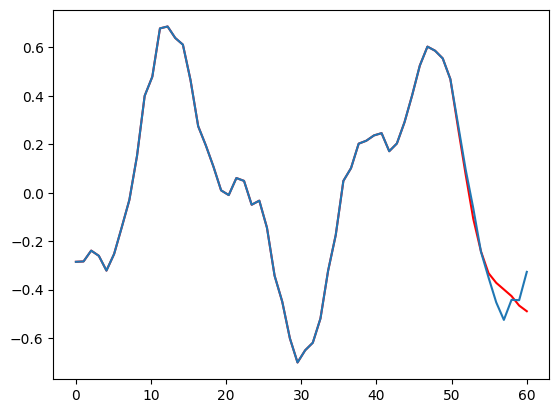

array([ 0.        ,  1.01694915,  2.03389831,  3.05084746,  4.06779661,
        5.08474576,  6.10169492,  7.11864407,  8.13559322,  9.15254237,
       10.16949153, 11.18644068, 12.20338983, 13.22033898, 14.23728814,
       15.25423729, 16.27118644, 17.28813559, 18.30508475, 19.3220339 ,
       20.33898305, 21.3559322 , 22.37288136, 23.38983051, 24.40677966,
       25.42372881, 26.44067797, 27.45762712, 28.47457627, 29.49152542,
       30.50847458, 31.52542373, 32.54237288, 33.55932203, 34.57627119,
       35.59322034, 36.61016949, 37.62711864, 38.6440678 , 39.66101695,
       40.6779661 , 41.69491525, 42.71186441, 43.72881356, 44.74576271,
       45.76271186, 46.77966102, 47.79661017, 48.81355932, 49.83050847,
       50.84745763, 51.86440678, 52.88135593, 53.89830508, 54.91525424,
       55.93220339, 56.94915254, 57.96610169, 58.98305085, 60.        ])

In [29]:
series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
 y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
 X = np.concatenate([X, y_pred_one], axis=1)
Y_pred = X[:, n_steps:]

import matplotlib.pyplot as plt
time=np.linspace(0,60,60)
X.reshape(60,1), X_new.shape, time.reshape(60,1)
plt.plot(time, X[0], c='red')
plt.plot(time, series[0])
plt.show()
time

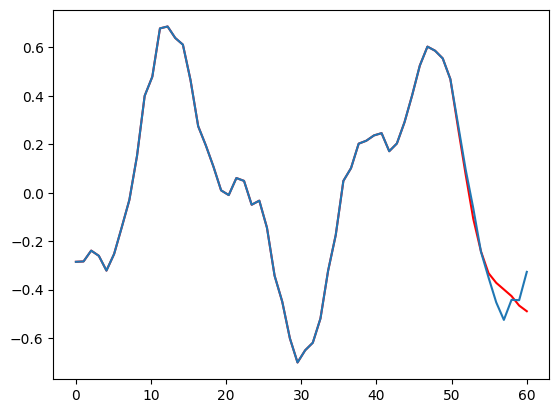

array([ 0.        ,  1.01694915,  2.03389831,  3.05084746,  4.06779661,
        5.08474576,  6.10169492,  7.11864407,  8.13559322,  9.15254237,
       10.16949153, 11.18644068, 12.20338983, 13.22033898, 14.23728814,
       15.25423729, 16.27118644, 17.28813559, 18.30508475, 19.3220339 ,
       20.33898305, 21.3559322 , 22.37288136, 23.38983051, 24.40677966,
       25.42372881, 26.44067797, 27.45762712, 28.47457627, 29.49152542,
       30.50847458, 31.52542373, 32.54237288, 33.55932203, 34.57627119,
       35.59322034, 36.61016949, 37.62711864, 38.6440678 , 39.66101695,
       40.6779661 , 41.69491525, 42.71186441, 43.72881356, 44.74576271,
       45.76271186, 46.77966102, 47.79661017, 48.81355932, 49.83050847,
       50.84745763, 51.86440678, 52.88135593, 53.89830508, 54.91525424,
       55.93220339, 56.94915254, 57.96610169, 58.98305085, 60.        ])

In [35]:
import matplotlib.pyplot as plt
time=np.linspace(0,60,60)
X.reshape(60,1), X_new.shape, time.reshape(60,1)
plt.plot(time, X[0], c='red')
plt.plot(time, series[0])
plt.show()
time